In [1]:
import sys
cifpath='/home/spc93/spc_cifs/'
sys.path.append('/dls_sw/i16/software/python')
sys.path.append('/dls_sw/i16/software/python/crystal')
import Crystal as Cr

mc = Cr.Crystal()
ciffile=cifpath+'YIG_icsd_2012.cif'
mc.load_cif(ciffile)
refs=mc.reflection_list(7.11)
#refs=mc.reflection_list(6.0, refl='all')



#    (h,k,l)           Intensity           Norm. Int.        Amplitude                               TwoTheta (deg)                d_spacing (A)       
1    (1, 2, 1)         47949.4954323       2.07547007097e-21 (-218.973732288+0j)                     19.8744068938                 5.05248084278       
2    (0, 2, 2)         19965.2261322       8.64184887118e-22 (-141.298358562+0j)                     22.9879854389                 4.37557676198       
3    (1, 3, 2)         141670.27908        6.13212759645e-21 (376.391125135+0j)                      30.5679270809                 3.30762512991       
4    (0, 4, 0)         37818968.8898       1.63697526612e-18 (6149.71291117+0j)                      32.7357498196                 3.094               
5    (0, 4, 2)         104493735.609       4.52295939519e-18 (-10222.2177442+0j)                     36.7295881252                 2.76735772895       
6    (2, 3, 3)         3255758.69843       1.40923896612e-19 (-1804.37210642+0j)        

In [2]:
refs=mc.reflection_list(6.0,refl='all', print_list=False)
#shortlist=[ref for ref in refs if ref[0][0]==0 and ref[0][1] == 0] #00l
shortlist=[ref for ref in refs if ref[0][0]==0 and ref[0][1] == ref[0][2]] #0kk
print 'hkl\t\tIint\t\ttth'
for ref in shortlist:
    print ref[0], '\t', ref[1], '\t', ref[4]

hkl		Iint		tth
(0, 1, 1) 	0 	13.5608395378
(0, 2, 2) 	19965.2261322 	27.3163952803
(0, 3, 3) 	0 	41.488094188
(0, 4, 4) 	140389475.333 	56.3620020602
(0, 5, 5) 	0 	72.3598835799
(0, 6, 6) 	1.35183516636e+12 	90.2077792083
(0, 7, 7) 	0 	111.472035775
(0, 8, 8) 	2.04597316589e+20 	141.649034105


In [1]:
datadir='/dls/i16/data/2018/cm19668-2/'

import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
%matplotlib nbagg
from matplotlib.pyplot import *
from numpy import *
from dlstools.dataloader import vec2mat
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
from dlstools import dataloader
d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus2m_path_template)
psnap=dataloader.tiffloader(datadir+'snapped-data/pilatus2M/'+'%05i.tif')

=== Importing dlstools package


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
Could not import plotting routines
No module named py4j.java_gateway


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


<IPython.core.display.Javascript object>


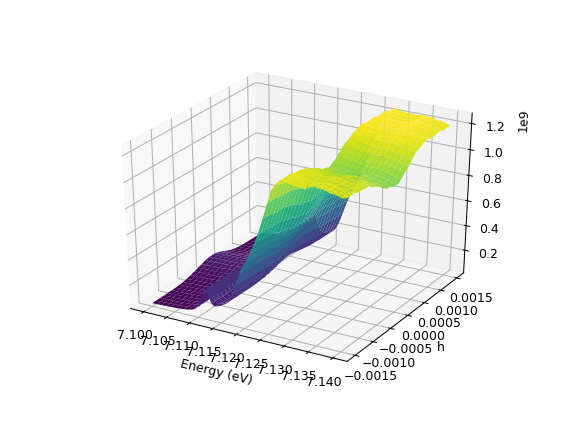

Text(0.5,0,u'h')

In [4]:
d(707007+30); d.y
first, numscans = 707007, 30
#figure()
energy, h, sumcnts = [], [], []
for scan in range(first, first+numscans+1):
    d(scan)
    energy+=list(d.energy2)
    h+=list(d.h)
    sumcnts+=list(d.sum)
    #plot(energy, h, sumcnts)
    #d.plot(d.energy2, d.sum, hold=1)

#ax = gcf().add_subplot(111, projection='3d')
#ax.plot(energy, h, sumcnts)
mx, my, mz = vec2mat(energy, h, sumcnts);
figure(); gca(projection='3d').plot_surface(mx, my, mz, cmap=cm.viridis); xlabel('Energy (eV)'); ylabel('h')


In [5]:
ang_urad=0.006*pi/180*1e6; print ang_urad

104.71975512


<IPython.core.display.Javascript object>


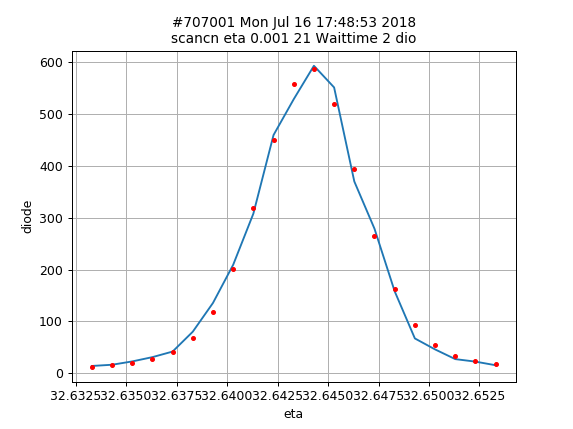

Function name: Pseudo-Voigt + const
area      :  4.27786368351 +/- None
centre    :  32.6440862354 +/- None
width     :  0.00594993490226 +/- None
lfrac     :  0.310529589918 +/- None
constant  :  4.54747350886e-13 +/- None



In [16]:
d(707001).plot('eta','diode')
fit(pv_c)

<IPython.core.display.Javascript object>


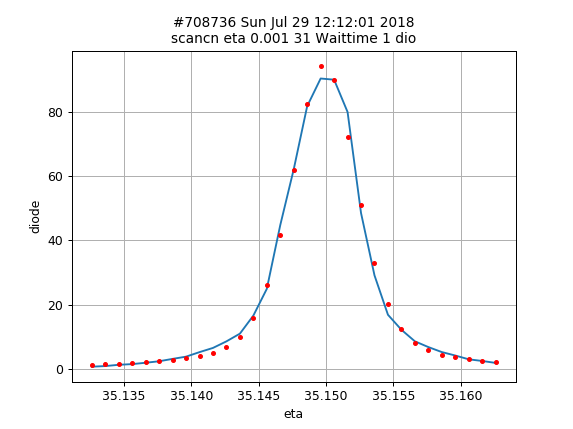

Function name: Pseudo-Voigt + const
area      :  0.719636983467 +/- None
centre    :  35.1498371786 +/- None
width     :  0.00587531484357 +/- None
lfrac     :  0.444863892138 +/- None
constant  :  -2.27373675443e-13 +/- None



In [15]:
d(708736)
d.plot('eta','diode')
fit(pv_c)

<IPython.core.display.Javascript object>


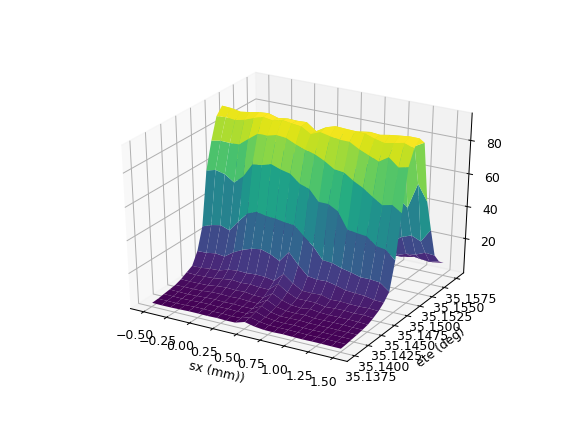

Text(0.5,0,u'ete (deg)')

In [8]:
d(708737)
mx, my, mz = vec2mat(d.sx, d.eta, d.diode);
figure(); gca(projection='3d').plot_surface(mx, my, mz, cmap=cm.viridis); xlabel('sx (mm))'); ylabel('ete (deg)')

In [11]:
sys.path.append('/dls_sw/i16/software/python/dlstools')
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
#from lmfit import minimize, Parameters, Parameter, report_fit

<IPython.core.display.Javascript object>


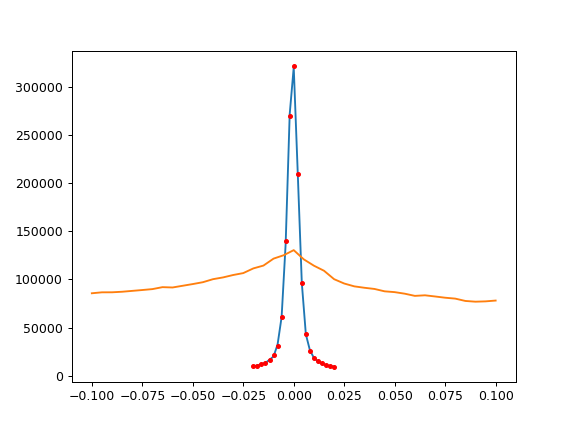

Function name: Pseudo-Voigt + const
area      :  2608.42299364 +/- 23.5945676994
centre    :  -0.000446483415528 +/- 8.85259012392e-06
width     :  0.00618330518622 +/- 2.87763718118e-05
lfrac     :  0.488872294079 +/- 0.0196786733005
constant  :  5952.87663354 +/- 494.61761436



(-0.11000000000000512,
 0.10999999999999802,
 -6155.9998974166174,
 337537.39530669787)

In [13]:
d(708742)
figure;
plot(d.eta-np.mean(d.eta), d.sum)
fit(pv_c)
d(708745)
plot(d.eta-np.mean(d.eta), d.sum*10)
axis('tight')